In [3]:
import  numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('/default of credit card clients.csv',header=1)
# df_train.columns=columns
df.head(30)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df=df.drop(["ID"],axis=1)#ID是不需要的，因此刪除

In [6]:
#查看類別特徵有幾個，數值特徵有幾個
all_cols=df.columns.tolist()
categorical=0
numerical=0
for col in all_cols:
    if(df[col].dtype == 'object'):
        categorical+=1
    else:
        numerical+=1
print(categorical)
print(numerical)

0
24


In [7]:
missing_data=df.isnull().sum()
missing_data[missing_data>0]

Series([], dtype: int64)

In [8]:
display(df.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
display(df['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
df=df[ df['MARRIAGE']!=0]

In [11]:
y=df[['default payment next month']]
y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [12]:
# df_merge,y_merge=SMOTE(random_state=42).fit_resample(df,y)
# display(df_merge)
# display(y_merge)

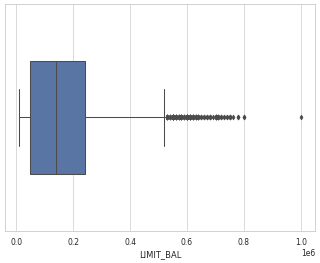

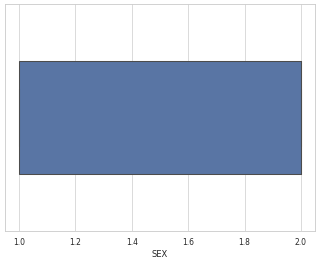

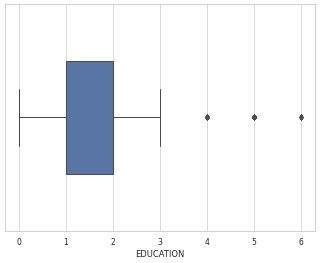

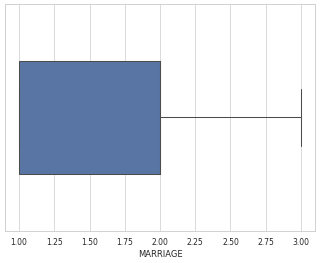

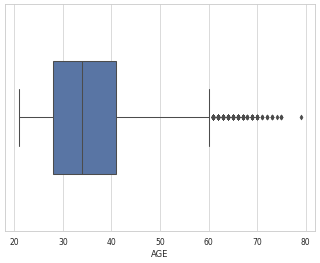

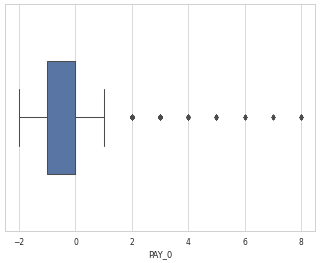

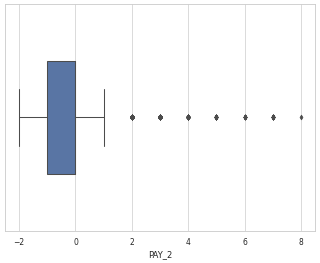

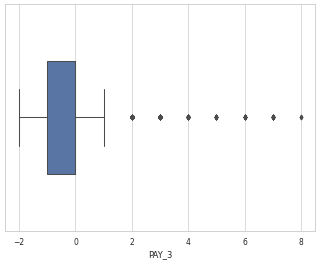

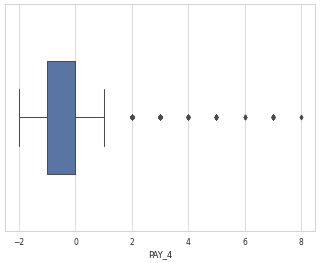

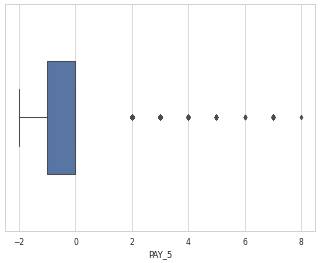

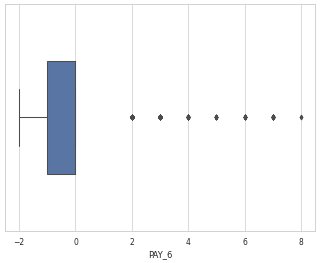

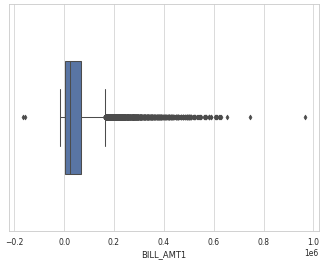

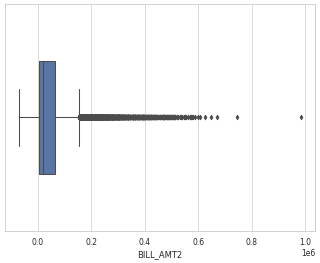

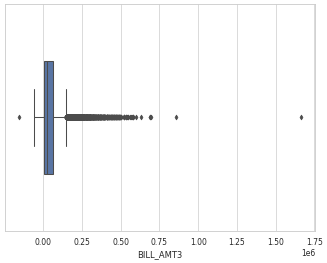

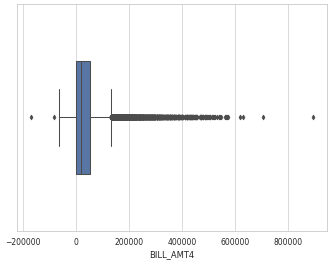

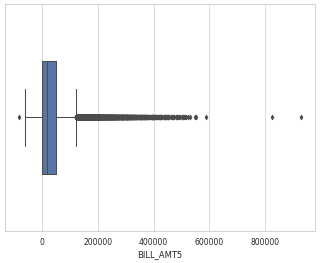

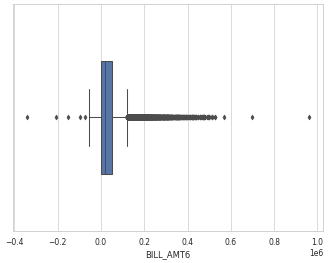

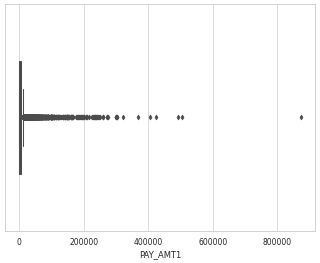

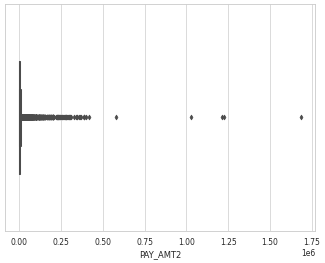

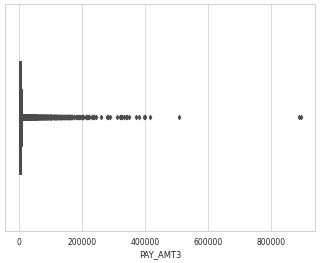

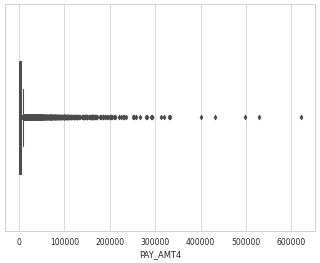

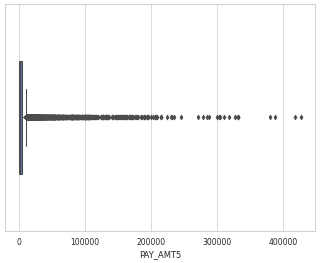

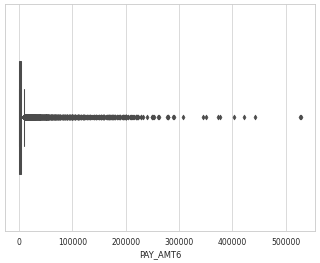

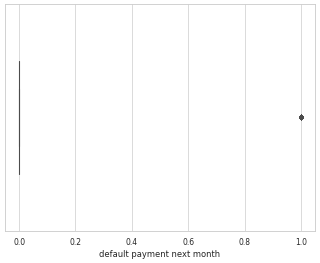

In [13]:
i=1
#相形圖可以找出最大值最小值
numerical_df=df.select_dtypes(include=['number'])
# print(numerical_df)
#代表不選擇字串的資料集
#numerical_df
# range(numerical)
for column in numerical_df:
    # plt.subplots(6,4,sharex='col')
    # ax1.plot()
    fig=plt.figure(figsize=(8,6),dpi=50)#創建一個圖形，並設置圖型寬為16英尺高為4英尺
    sns.set_theme(style="whitegrid")#setting the theme style or background
    sns.boxplot(numerical_df[column],showfliers="TRUE",width=0.5)#針對每一個特徵畫出廂型圖

In [14]:
df['totalBillAmt']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['totalPayAmt']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
# df=df+df[['totalBillAmt']]
df.drop(["PAY_AMT1"],axis=1, inplace=True)
df.drop(["PAY_AMT2"],axis=1, inplace=True)
df.drop(["PAY_AMT3"],axis=1, inplace=True)
df.drop(["PAY_AMT4"],axis=1, inplace=True)
df.drop(["PAY_AMT5"],axis=1, inplace=True)
df.drop(["PAY_AMT6"],axis=1, inplace=True)
df.drop(["BILL_AMT1"],axis=1, inplace=True)
df.drop(["BILL_AMT2"],axis=1, inplace=True)
df.drop(["BILL_AMT3"],axis=1, inplace=True)
df.drop(["BILL_AMT4"],axis=1, inplace=True)
df.drop(["BILL_AMT5"],axis=1, inplace=True)
df.drop(["BILL_AMT6"],axis=1, inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,totalBillAmt,totalPayAmt
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,7704,689
1,120000,2,2,2,26,-1,2,0,0,0,2,1,17077,5000
2,90000,2,2,2,34,0,0,0,0,0,0,0,101653,11018
3,50000,2,2,1,37,0,0,0,0,0,0,0,231334,8388
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,0,725349,42550
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,0,21182,14490
29997,30000,1,2,2,37,4,3,2,-1,0,0,1,70496,31300
29998,80000,1,3,1,41,1,-1,0,0,0,-1,1,266611,147181


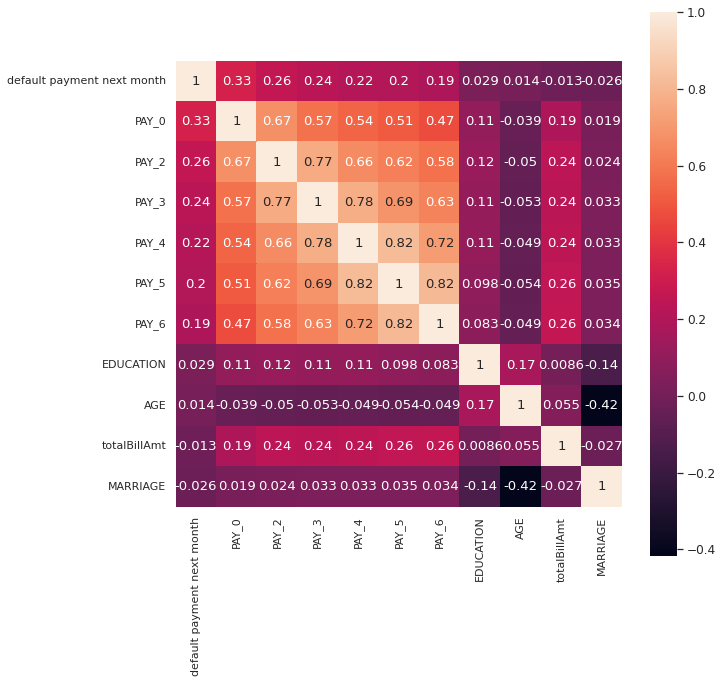

In [15]:
#檢視與標籤10個最相關的特徵屬性
train = df.iloc[:len(y),:]
cols = train .corr().nlargest(11,'default payment next month').index
plt.subplots(figsize=(10,10))
sns.set(font_scale=1.1)
sns.heatmap(train[cols].corr(),square=True, annot=True)

In [16]:
df=df.drop(columns=['default payment next month'],axis=1)

In [17]:
df=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION','AGE','totalBillAmt','MARRIAGE']]
df

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION,AGE,totalBillAmt,MARRIAGE
0,2,2,-1,-1,-2,-2,2,24,7704,1
1,-1,2,0,0,0,2,2,26,17077,2
2,0,0,0,0,0,0,2,34,101653,2
3,0,0,0,0,0,0,2,37,231334,1
4,-1,0,-1,0,0,0,2,57,109339,1
...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,3,39,725349,1
29996,-1,-1,-1,-1,0,0,3,43,21182,2
29997,4,3,2,-1,0,0,2,37,70496,2
29998,1,-1,0,0,0,-1,3,41,266611,1


In [18]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df,y,test_size=0.2,stratify=y,random_state=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion='entropy',random_state=1)
from sklearn.metrics import accuracy_score
tree_model.fit(df_train,y_train)
y_train_pred=tree_model.predict(df_train)
y_test_pred=tree_model.predict(df_test)
tree_train=accuracy_score(y_train,y_train_pred)
tree_test=accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'%(tree_train,tree_test))

Decision tree train/test accuracies 0.994/0.727


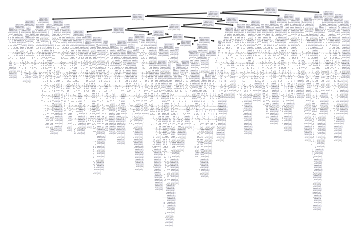

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib.pyplot import figure
from sklearn import tree
tree.plot_tree(tree_model)
# plt.figure(figsize=(64, 64))
figure(figsize=(8, 6), dpi=80)
plt.show()

In [21]:
path=tree_model.cost_complexity_pruning_path(df_train,y_train)
#path變數給出了ccp_alphas和雜質兩個東西
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)
print("Impurities in Decision Tree :",impurities)

[0.         0.         0.         ... 0.00914746 0.02116107 0.09064216]
Impurities in Decision Tree : [0.01635733 0.01635733 0.01635733 ... 0.65099885 0.67215992 0.76280208]


In [22]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(df_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.09064216361990207


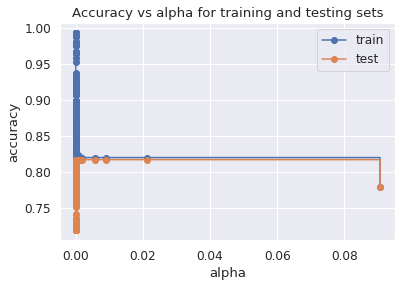

In [23]:
train_scores = [clf.score(df_train, y_train) for clf in clfs]
test_scores = [clf.score(df_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

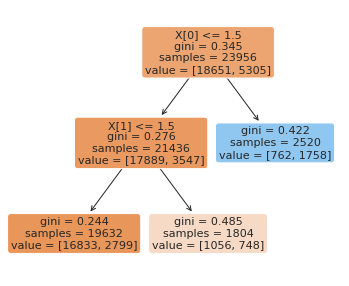

0.8171953255425709

In [24]:
clf=DecisionTreeClassifier(random_state=1,ccp_alpha=0.01)
clf.fit(df_train,y_train)
plt.figure(figsize=(6,5))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()
accuracy_score(y_test,clf.predict(df_test))

In [25]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':[4,15,20,50,100],'min_samples_leaf':[2,3,5,10]
        }
grid = GridSearchCV(estimator=tree_model,
                    param_grid=params,
                    cv=10,
                    scoring='accuracy',refit=True,verbose=3)
grid = grid.fit(df_train, y_train)
y_test_pred = grid.predict(df_test)
#顯示最佳參數組合
print(grid.best_params_)
outcome=grid.best_estimator_
print(outcome)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.828 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.821 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.816 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.821 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.834 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.815 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.818 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.827 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.828 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=2;, score=0.812 total

In [26]:
grid.best_score_

0.8224660795131762

In [27]:
outcome=grid.best_estimator_
print(outcome)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=1)


In [28]:
treemodel=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=1)
treemodel.fit(df_train,y_train)
y_train_pred=treemodel.predict(df_train)
y_test_pred=treemodel.predict(df_test)
treetrain=accuracy_score(y_train,y_train_pred)
treetest=accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'%(treetrain,treetest))

Decision tree train/test accuracies 0.994/0.727


Accuracy: 0.818


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4664
           1       0.67      0.35      0.46      1326

    accuracy                           0.82      5990
   macro avg       0.75      0.65      0.68      5990
weighted avg       0.80      0.82      0.80      5990



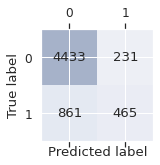

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy: %.3f' % accuracy_score(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_test_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_test_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test,y_test_pred))

Precision: 0.668
Recall: 0.351
F1: 0.460
Accuracy: 0.818


**做SMOTE處理**

In [31]:
# display(y_train['default payment next month'].value_counts())

In [32]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# df_merge,y_merge=SMOTE(sampling_strategy=0.9,k_neighbors=2,random_state=42).fit_resample(df,y)
# print(y_merge['default payment next month'].value_counts())
# df_train,df_test,y_train,y_test=train_test_split(df_merge,y_merge,test_size=0.5,random_state=1,stratify=y_merge)

In [33]:
# treemodel=DecisionTreeClassifier(criterion='entropy',random_state=1)
# from sklearn.metrics import accuracy_score
# treemodel.fit(df_train,y_train)
# y_train_pred=treemodel.predict(df_train)
# y_test_pred=treemodel.predict(df_test)
# tree_train=accuracy_score(y_train,y_train_pred)
# tree_test=accuracy_score(y_test,y_test_pred)
# print('Decision tree train/test accuracies %.3f/%.3f'%(tree_train,tree_test))

In [34]:
# params={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,10,15,20,25,30,35,40,45,50,55,60,65,70,100],'min_samples_leaf':[2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,100]}
# grid1 = GridSearchCV(estimator=tree_model,
#                      param_grid=params,
#                      cv=6,
#                      scoring='accuracy',refit=True,verbose=3)
# grid1= grid1.fit(df_train, y_train)
# y_test_pred = grid1.predict(df_test)
# # 顯示最佳參數組合
# print(grid1.best_params_)
# outcome=grid1.best_estimator_
# print(outcome)

In [35]:
# grid1.best_score_